In [40]:
import pandas as pd
from datetime import datetime
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns


In [31]:
# 代码自动完成提示 tab 键
%config IPCompleter.greedy=True

# 一个 cell 可以多行输出
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all" 

# 基本操作

https://www.kesci.com/home/project/59e77a636d213335f38daec2/code

## numpy 100
https://github.com/rougier/numpy-100

## from python to numpy
https://www.labri.fr/perso/nrougier/from-python-to-numpy/

## pandas 100
+ 英文：https://github.com/ajcr/100-pandas-puzzles
+ 中文：https://zhuanlan.zhihu.com/p/81522561

## 生成/操作时间

+ 生成 ts 序列，按小时 H
+ 生成 df，一列是 ts，一列是 random
+ 把 ts 变成 df 的 index
+ 根据 index 选取 df 中的数据
+ 对 df 进行滚动（时间窗口），求和/平均等；
+ 字符串，特殊格式的字符串，转成 datetime
+ unix 秒数 --> UTC datetime  --> 特定 timezone 的 datetime

### type op
+ 查看类型 type
+ 查看所有 column 的类型 dtypes


In [32]:
date_rng = pd.date_range(start='1/1/2018', end='1/08/2018', freq='H')

In [33]:
date_rng

type(date_rng[0])

DatetimeIndex(['2018-01-01 00:00:00', '2018-01-01 01:00:00',
               '2018-01-01 02:00:00', '2018-01-01 03:00:00',
               '2018-01-01 04:00:00', '2018-01-01 05:00:00',
               '2018-01-01 06:00:00', '2018-01-01 07:00:00',
               '2018-01-01 08:00:00', '2018-01-01 09:00:00',
               ...
               '2018-01-07 15:00:00', '2018-01-07 16:00:00',
               '2018-01-07 17:00:00', '2018-01-07 18:00:00',
               '2018-01-07 19:00:00', '2018-01-07 20:00:00',
               '2018-01-07 21:00:00', '2018-01-07 22:00:00',
               '2018-01-07 23:00:00', '2018-01-08 00:00:00'],
              dtype='datetime64[ns]', length=169, freq='H')

pandas._libs.tslibs.timestamps.Timestamp

In [34]:
# 作为列，生成 df，并生成随机的另一列
df = pd.DataFrame(date_rng, columns=['date'])
df['data'] = np.random.randint(0,100,size=(len(date_rng)))
df.dtypes
df.head(5)

date    datetime64[ns]
data             int64
dtype: object

,date,data
0,2018-01-01 00:00:00,72
1,2018-01-01 01:00:00,14
2,2018-01-01 02:00:00,33
3,2018-01-01 03:00:00,28
4,2018-01-01 04:00:00,10


In [35]:
# 把 Timestamp 转换成 datetime，并建立 index，删除原先列
df['datetime'] = pd.to_datetime(df['date'])
df = df.set_index('datetime')
df.drop(['date'], axis=1, inplace=True)
df.head()

,data
datetime,
2018-01-01 00:00:00,72
2018-01-01 01:00:00,14
2018-01-01 02:00:00,33
2018-01-01 03:00:00,28
2018-01-01 04:00:00,10


In [14]:
# 插曲-1
# 构建 字符串 日期
string_date_rng = [str(x) for x in date_rng]
# 查看前 5 个
string_date_rng[:5]
type(string_date_rng)
type(string_date_rng[0])


# 把 字符换日期，转成 datetime
timestamp_date_rng = pd.to_datetime(string_date_rng, infer_datetime_format=True)
timestamp_date_rng

['2018-01-01 00:00:00',
 '2018-01-01 01:00:00',
 '2018-01-01 02:00:00',
 '2018-01-01 03:00:00',
 '2018-01-01 04:00:00']

list

str

DatetimeIndex(['2018-01-01 00:00:00', '2018-01-01 01:00:00',
               '2018-01-01 02:00:00', '2018-01-01 03:00:00',
               '2018-01-01 04:00:00', '2018-01-01 05:00:00',
               '2018-01-01 06:00:00', '2018-01-01 07:00:00',
               '2018-01-01 08:00:00', '2018-01-01 09:00:00',
               ...
               '2018-01-07 15:00:00', '2018-01-07 16:00:00',
               '2018-01-07 17:00:00', '2018-01-07 18:00:00',
               '2018-01-07 19:00:00', '2018-01-07 20:00:00',
               '2018-01-07 21:00:00', '2018-01-07 22:00:00',
               '2018-01-07 23:00:00', '2018-01-08 00:00:00'],
              dtype='datetime64[ns]', length=169, freq=None)

In [16]:
# 插曲-2
# 字符串有固定格式，转成 datetime
string_date_rng_2 = ['June-01-2018', 'June-02-2018', 'June-03-2018']
timestamp_date_rng_2 = [datetime.strptime(x,'%B-%d-%Y') for x in string_date_rng_2]
timestamp_date_rng_2[:5]
type(timestamp_date_rng_2[0])

df2 = pd.DataFrame(timestamp_date_rng_2, columns=['date'])
df2

[datetime.datetime(2018, 6, 1, 0, 0),
 datetime.datetime(2018, 6, 2, 0, 0),
 datetime.datetime(2018, 6, 3, 0, 0)]

datetime.datetime

,date
0,2018-06-01
1,2018-06-02
2,2018-06-03


In [24]:
# 插曲-3
# 把 unix 戳 转成 datetime UTC
epoch_t = 1529272655
real_t = pd.to_datetime(epoch_t, unit='s')
real_t

# 再把 UTC 转成 其它时区
real_t.tz_localize('UTC').tz_convert('Asia/Shanghai')

Timestamp('2018-06-17 21:57:35')

Timestamp('2018-06-18 05:57:35+0800', tz='Asia/Shanghai')

In [38]:
# 假设只想查看本月2号的数据，可以使用如下索引。
df[df.index.day == 2][:5]

# 也可以通过数据框索引直接调用想查看的日期
df['2018-01-02'][:5]

# 在特定日期之间选择数据
df['2018-01-04 20:00:00':'2018-01-05 02:00:00']

,data
datetime,
2018-01-02 00:00:00,79
2018-01-02 01:00:00,51
2018-01-02 02:00:00,81
2018-01-02 03:00:00,24
2018-01-02 04:00:00,4


,data
datetime,
2018-01-02 00:00:00,79
2018-01-02 01:00:00,51
2018-01-02 02:00:00,81
2018-01-02 03:00:00,24
2018-01-02 04:00:00,4


,data
datetime,
2018-01-04 20:00:00,29
2018-01-04 21:00:00,99
2018-01-04 22:00:00,58
2018-01-04 23:00:00,3
2018-01-05 00:00:00,92
2018-01-05 01:00:00,89
2018-01-05 02:00:00,64


In [20]:
# 随机数是按照小时生成的(H)，但是可以直接按天(D)查看

# 计算每天数据的平均值:
df.resample('D').mean()

,data
datetime,
2018-01-01,56.583333
2018-01-02,57.458333
2018-01-03,48.250000
2018-01-04,52.000000
2018-01-05,48.000000
2018-01-06,55.458333
2018-01-07,49.166667
2018-01-08,76.000000


In [39]:
# 诸如滚动平均值或滚动和之类的窗口统计信息
df['rolling_sum'] = df.rolling(3).sum()
df.head(5)

,data,rolling_sum
datetime,,
2018-01-01 00:00:00,72,NaN
2018-01-01 01:00:00,14,NaN
2018-01-01 02:00:00,33,119.0
2018-01-01 03:00:00,28,75.0
2018-01-01 04:00:00,10,71.0


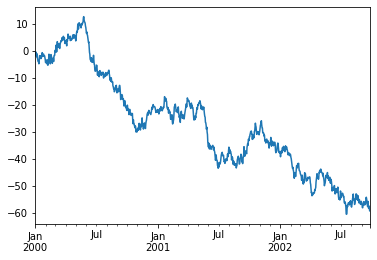

In [42]:
ts = pd.Series(np.random.randn(1000),
               index=pd.date_range('1/1/2000', periods=1000))

ts = ts.cumsum()
ts.plot()

###  音频
音频文件是样本的一维数组。每个样本都是一个数字，代表音频信号的一小部分。CD 质量的音频每秒包含 44,100 个样本，每个样本是-65535 到 65536 之间的整数。这意味着如果你有一个 10 秒的 CD 质量 WAVE 文件，你可以将它加载到长度为 10 * 44,100 = 441,000 的 NumPy 数组中。如果想要提取音频的第一秒，只需将文件加载到 audio 的 NumPy 数组中，然后获取 audio[:44100]。